# Отчет

Для начала работы необходимо добавить в файлы colab нужный csv файл и подключить следующие библиотеки: pandas – считывающая с файла данные, numpy – для работы с массивами, matplotlib – для графиков и math – для вычисления.
Далее был считан файл со статистикой просмотров и регистраций – данные внесены в 2 массива numpy – views и regs.
Следующим шагом было посчитано отношение regs к views и эти данные занесены в новый массив regs_views в процентном виде десятичной дробью. Подсчитана сумма значений всех предыдущих массивов – записаны в соответствующие переменные.
Был отображен точечный график, показывающий зависимость views от regs.
Были реализованы 3 функции для вычисления среднего значения, дисперсии, коэффициента корреляции. Был реализован метод наименьших квадратов, использующий только «самописные» функции. Значения, полученные данными функциями, были записаны для каждого массива данных в переменные.
При помощи метода наименьших квадратов был отображен график линейной регрессии. Данный метод был изучен нами ранее и закреплен в этой работе при помощи вспомогательных материалов.
Для ответа на вопрос «Сколько планируется получить зарегистрировавшихся (или скачавших) программный продукт при количестве посещений сайта в 8000 человек?» нужно было поставить в функцию Ax+B=y, где x – views, y – regs, значение x = 8000. Ответ: 42 человека.
Для ответа на вопрос «Для обеспечения 500 скачиваний продукта, сколько человек должны зайти на сайт?» нужно было поставить в ту же функцию значение y = 500. Ответ: 96921 человека.


# Практическая часть

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df = pd.read_csv('website_stat.csv')
display(df)
vv=df['site_views'].tolist()
rr=df['site_regs'].tolist()
views=np.array([0]*len(vv))
regs=np.array([0]*len(rr))
for i in range(len(views)):
  views[i]=vv[i]
  regs[i]=rr[i]
display(views,regs)

,day,site_views,site_regs
0,5,5252,21
1,6,7620,46
2,7,941,9
3,8,1159,8
4,9,485,3
5,10,299,6
6,11,239,4
7,12,195,2
8,13,181,2
9,14,180,2


array([5252, 7620,  941, 1159,  485,  299,  239,  195,  181,  180])

array([21, 46,  9,  8,  3,  6,  4,  2,  2,  2])

In [ ]:
regs_views=[0]*len(views)
for i in range(len(views)-1):
  regs_views[i]=regs[i]/views[i]*100
display(regs_views)

[0.39984767707539987,
 0.6036745406824147,
 0.9564293304994688,
 0.6902502157031924,
 0.6185567010309279,
 2.0066889632107023,
 1.6736401673640167,
 1.0256410256410255,
 1.1049723756906076,
 0]

In [ ]:
sum_r_v=0
sum_r=0
sum_v=0
for i in range(len(regs_views)):
  sum_r_v+=regs_views[i]
  sum_r+=views[i]
  sum_v+=regs[i]
sum_r_v/=len(regs_views)
display(sum_r_v,sum_r,sum_v)

0.9079700996897756

16551

103

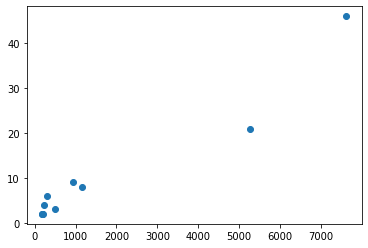

In [ ]:
p1=plt.plot(vv,regs,' o')
plt.show()

In [ ]:
def mean1(a):
  q=0
  for i in a:
    q+=i
  q/=len(a)
  return q

def dispersion(a):
  q=0
  for i in a:
    q+=(i-mean1(a))**2
  q/=len(a)
  return q

def correlation(a,b):
  q=0
  for i in range(len(a)):
    q+=(a[i]-mean1(a))*(b[i]-mean1(b))
  q/=len(a)*math.sqrt(dispersion(a)*dispersion(b))
  return q

mean_views=mean1(df.site_views)
mean_regs=mean1(df.site_regs)
disp_views=dispersion(df.site_views)
disp_regs=dispersion(df.site_regs)
corr=correlation(df.site_views,df.site_regs)

In [ ]:
display(mean_regs,mean_views)

10.3

1655.1

In [ ]:
display(disp_regs,disp_views)

171.41000000000005

6096803.89

In [ ]:
display(corr)

0.9694433977097228

In [ ]:
a=0
b=0
for i in range(len(regs)):
  a+=views[i]*regs[i]
  b+=views[i]**2
A_point=(mean1(df.site_views)*mean1(df.site_regs)-(a/len(regs)))/(mean1(df.site_views)**2-b/len(regs))
B_point=mean1(df.site_regs)-A_point*mean1(df.site_views)

In [ ]:
display(A_point,B_point)

0.005140311311538676

1.7922707482723386

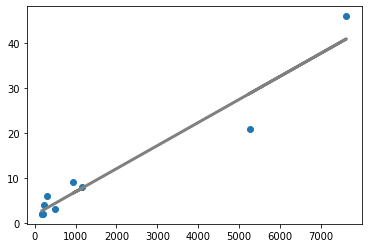

In [ ]:
y=[0]*len(views)
for i in range(len(views)):
  y[i]=A_point*views[i]+B_point
plt.plot(views,regs,' o',views,y,'grey',lw='3')
plt.show()

In [ ]:
desired_regs=A_point*8000+B_point
display(math.floor(desired_regs))

42

In [ ]:
desired_views=(500-B_point)/A_point
display(math.floor(desired_views))

96921